# **Introduction**

Tennis is a fun sport that attracts fans from all over the world. The sport is played on three different surfaces: clay, grass, and hard courts, each of which favors different tactics and styles of play. The ATP - The Association of Tennis Professionals (Male Professionals) is the tour where the best players compete against each other. To make it to professional levels, players spend thousands of hours training, working on their athleticism, technique, mental-toughness, and strategy. The complexity of these components makes tennis matches entertaining to watch and often quite hard to predict.


As a former NCAA Division I and professional player and coach, I have a deep connection to the sport. I believe that this project not only enriches my tennis knoweledge, but it can also deepen the insights I offer to players when I coach.

# **Project Outline**
This project involves applying supervised learning techniques to analyze a dataset of tennis matches. The objective is to utilize different machine learning models to classify outcomes and predict variables of interest in the dataset. The aim is to compare the performance of various models and determine which model best predicts the outcomes of tennis matches.

Models Implemented
- **Logistic Regression**: Used for predicting binary outcomes by estimating probabilities using a logistic function.
- **Support Vector Machine (SVM) with RBF Kernel**: A complex model that uses a Radial Basis Function kernel to handle non-linear data.
- **Support Vector Machine (SVM) with Linear Kernel**: Utilized for creating a linear decision boundary to separate data points in different classes.
- **Random Forests**: An ensemble learning method that uses multiple decision trees to improve classification accuracy and control over-fitting.


# **Data Source**
The data set I used can be found here: https://www.kaggle.com/datasets/dissfya/atp-tennis-2013-2023

The data set contains 17 columns (which will be analyzed later) with 431154 data points which reveal information about ATP matches from 2013 to 2023.

The data set is quite large, so I will sample the data and select to work only on data from 2019 - 2023.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, mean_squared_error
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [2]:
# Import data from GitHub repo
file_path = 'https://raw.githubusercontent.com/arusu04/ML-Project/main/atp_tennis.csv'

# Read the data into a pandas DataFrame
df = pd.read_csv(file_path)

# Convert 'Date' to datetime format and extract year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Filter the data for the years 2019 to 2023
df = df[(df['Year'] >= 2019) & (df['Year'] <= 2023)]

# After filtering by years, reset the index to avoid potential issues
df = df[(df['Year'] >= 2019) & (df['Year'] <= 2023)].reset_index(drop=True)


I noticed that it would be best if column 'Winner' would be binary in relation to 'Player_1'. Thus:

In [3]:
df['Player_1_Win'] = np.where(df['Winner'] == df['Player_1'], 1, 0)

# **Exploratory Data Analysis**

I will first perform EDA to analyze the datasets, find patterns and corrrelations, detect anomalies, and test hypotheses.

Summary Statistics:
           Best of       Rank_1       Rank_2         Pts_1         Pts_2  \
count  9666.000000  9666.000000  9666.000000   9666.000000   9666.000000   
mean      3.413511    72.804469    71.607076   1591.953342   1568.243017   
std       0.824244    90.533072    78.195830   1779.598915   1757.431150   
min       0.000000     1.000000     1.000000      1.000000      2.000000   
25%       3.000000    25.000000    26.000000    686.000000    675.000000   
50%       3.000000    54.000000    55.000000    990.000000    977.000000   
75%       3.000000    90.000000    93.000000   1716.750000   1650.000000   
max       5.000000  2146.000000  1491.000000  12415.000000  12415.000000   

             Odd_1        Odd_2         Year  Player_1_Win        Month  \
count  9666.000000  9666.000000  9666.000000   9666.000000  9666.000000   
mean      2.529923     2.600740  2020.768674      0.500000     5.386303   
std       2.356768     2.502298     1.313339      0.500026     3.10505

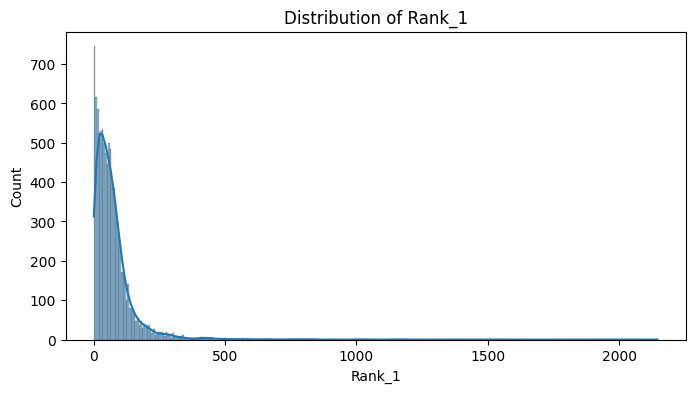

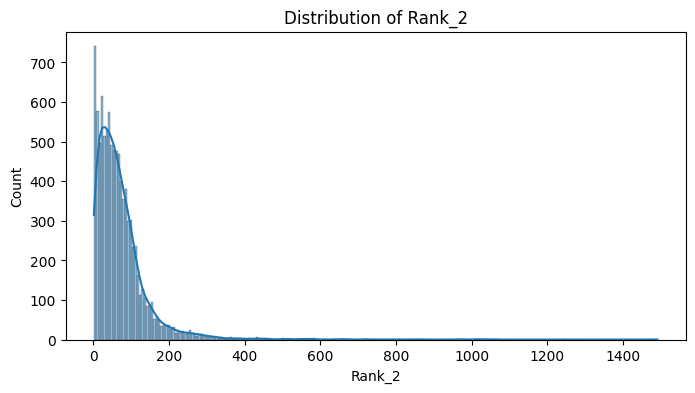

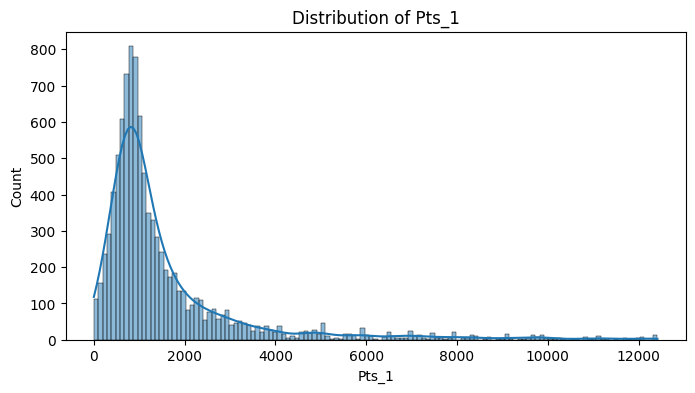

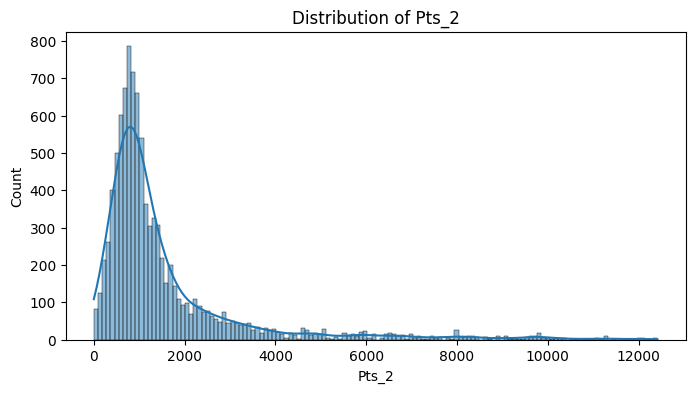

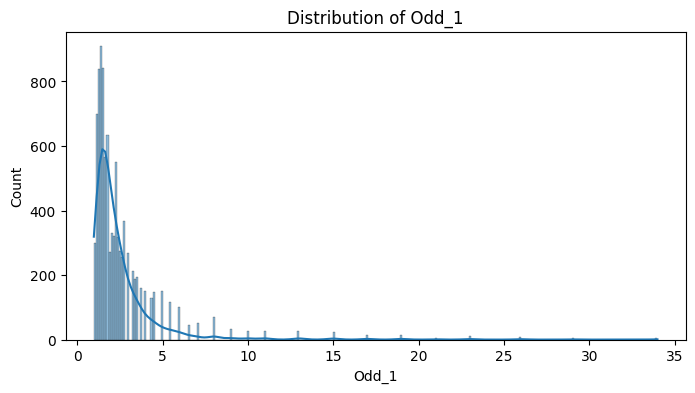

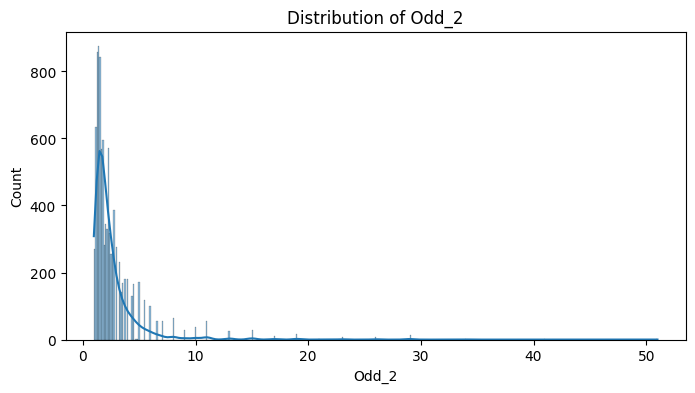

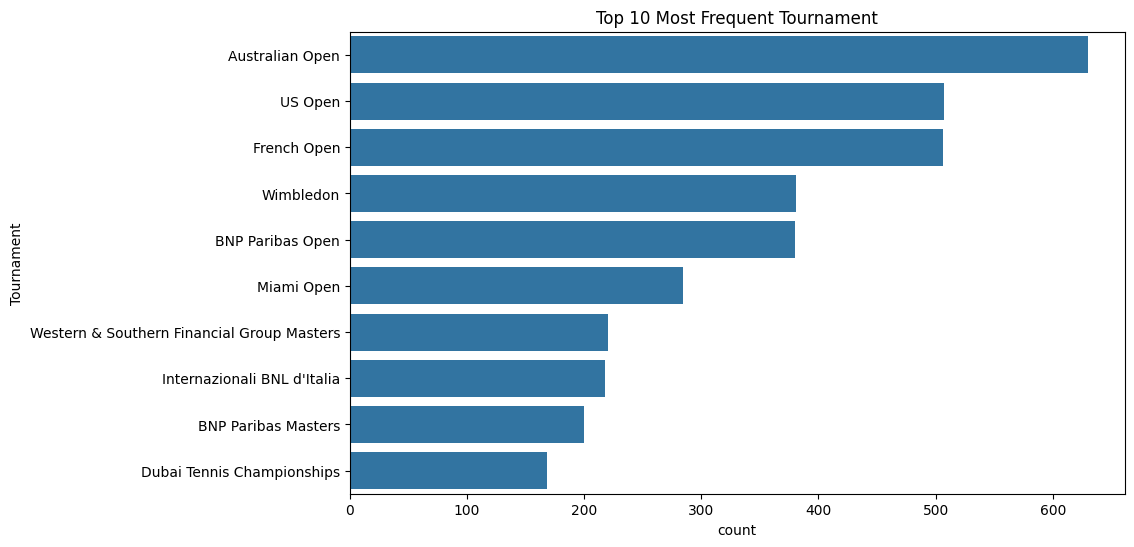

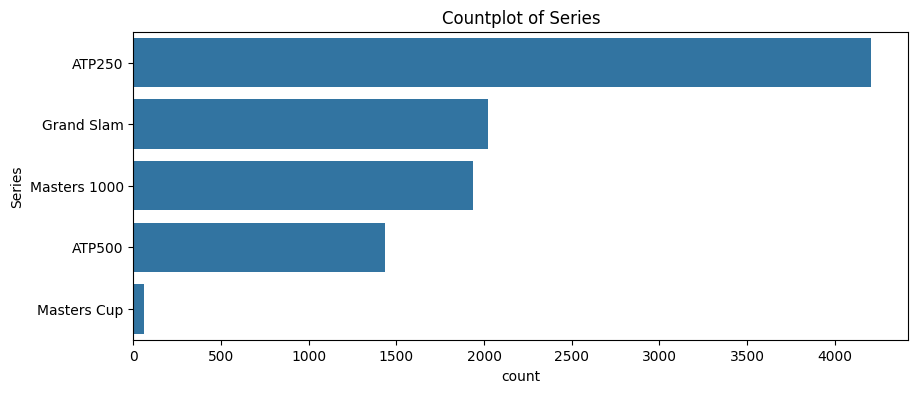

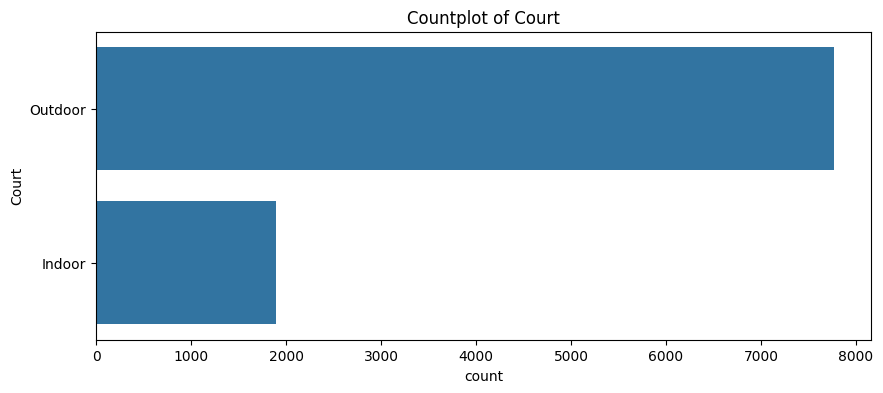

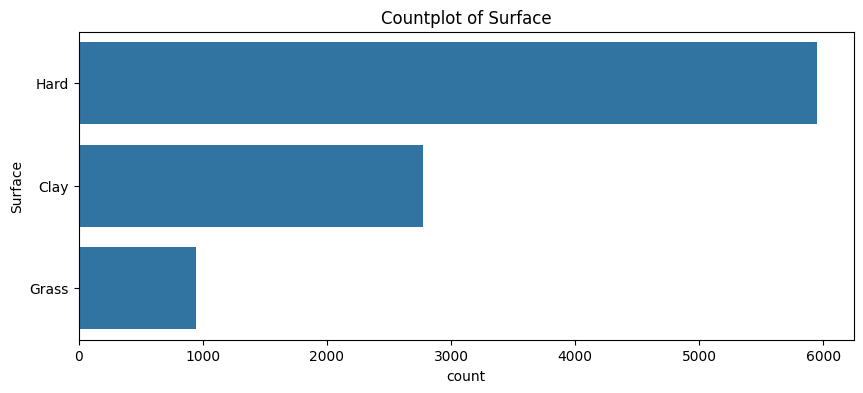

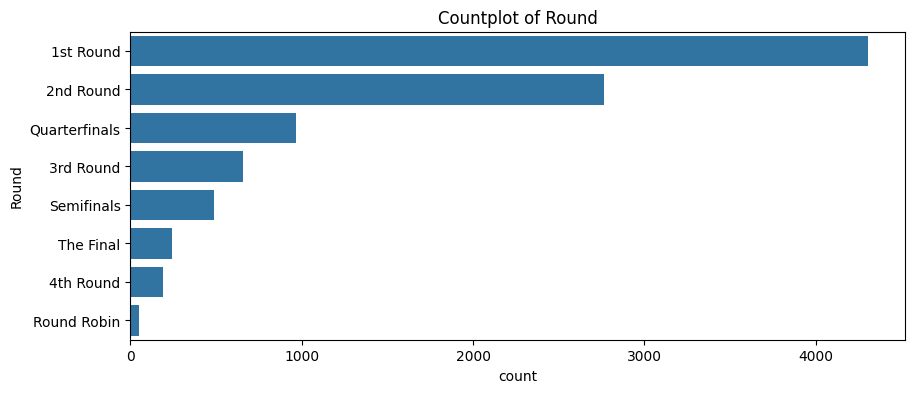


Bivariate Analysis:


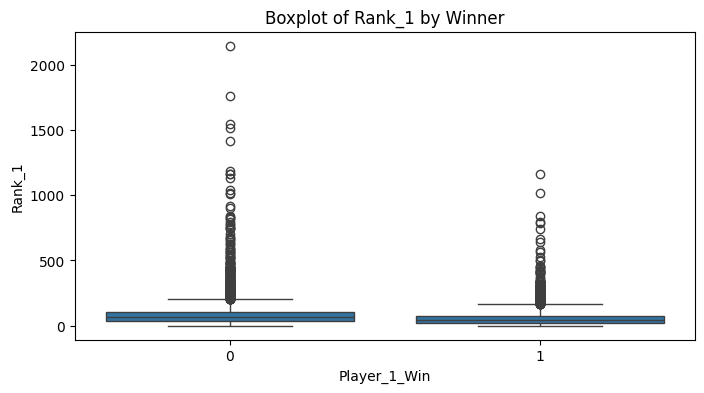

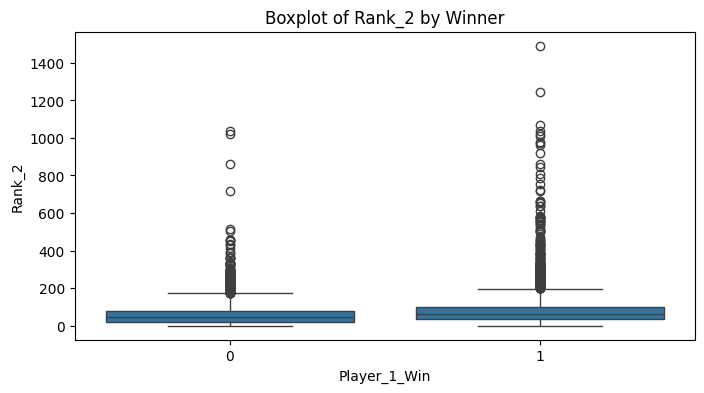

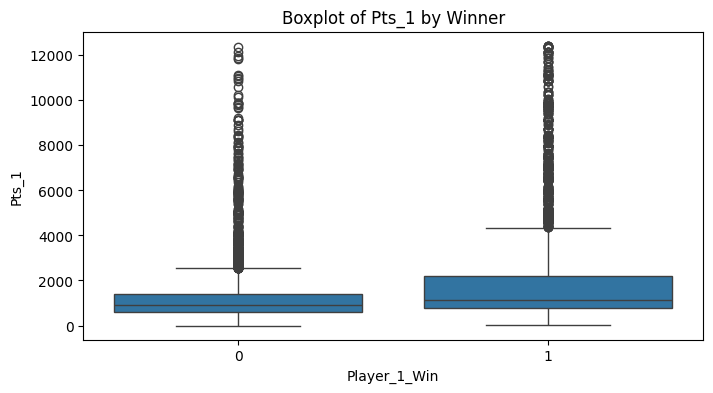

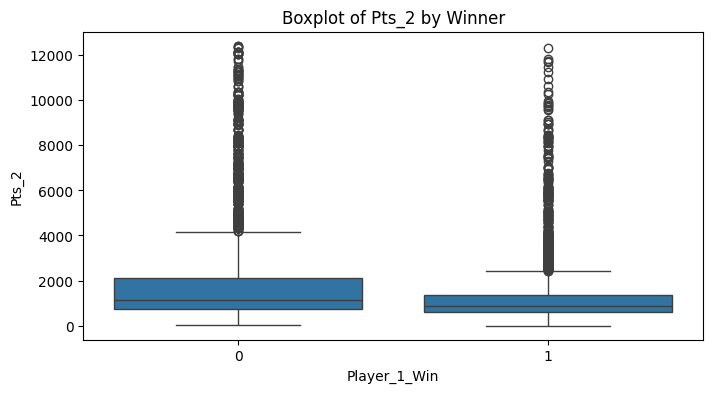

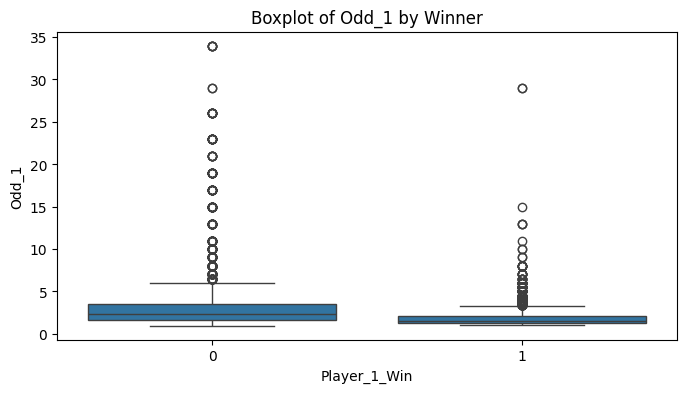

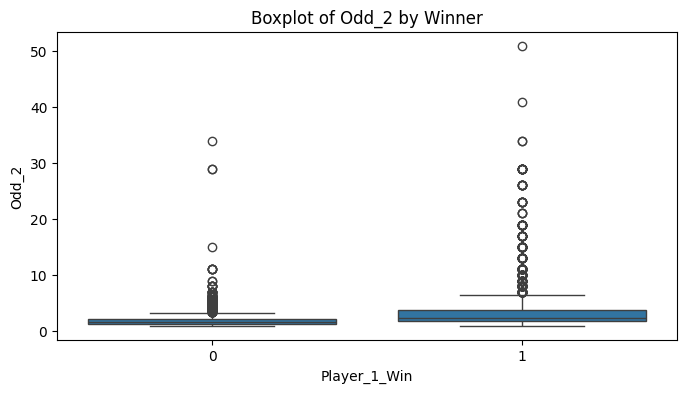


Correlation Analysis:


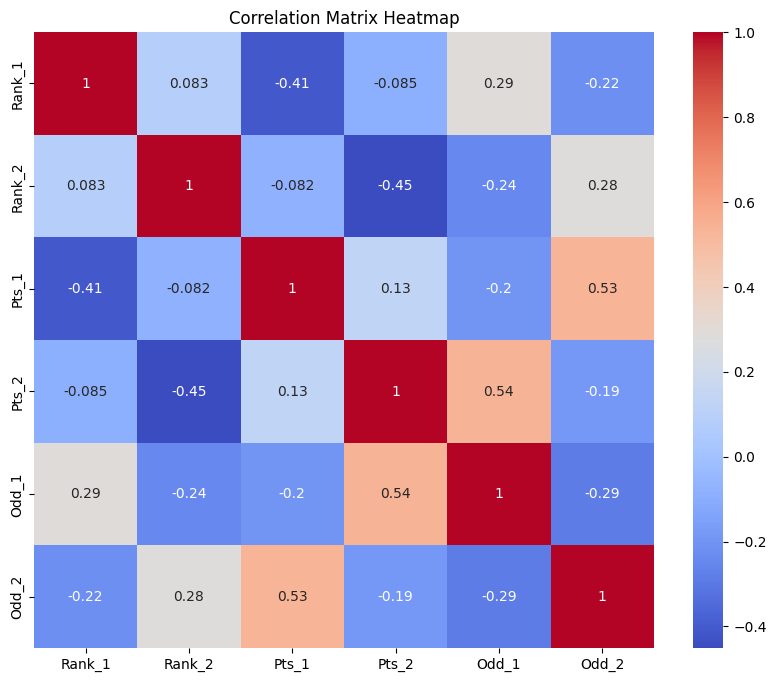


Outlier Detection:
Number of outliers in Rank_1: 133
Number of outliers in Rank_2: 135
Number of outliers in Pts_1: 306
Number of outliers in Pts_2: 290
Number of outliers in Odd_1: 169
Number of outliers in Odd_2: 171


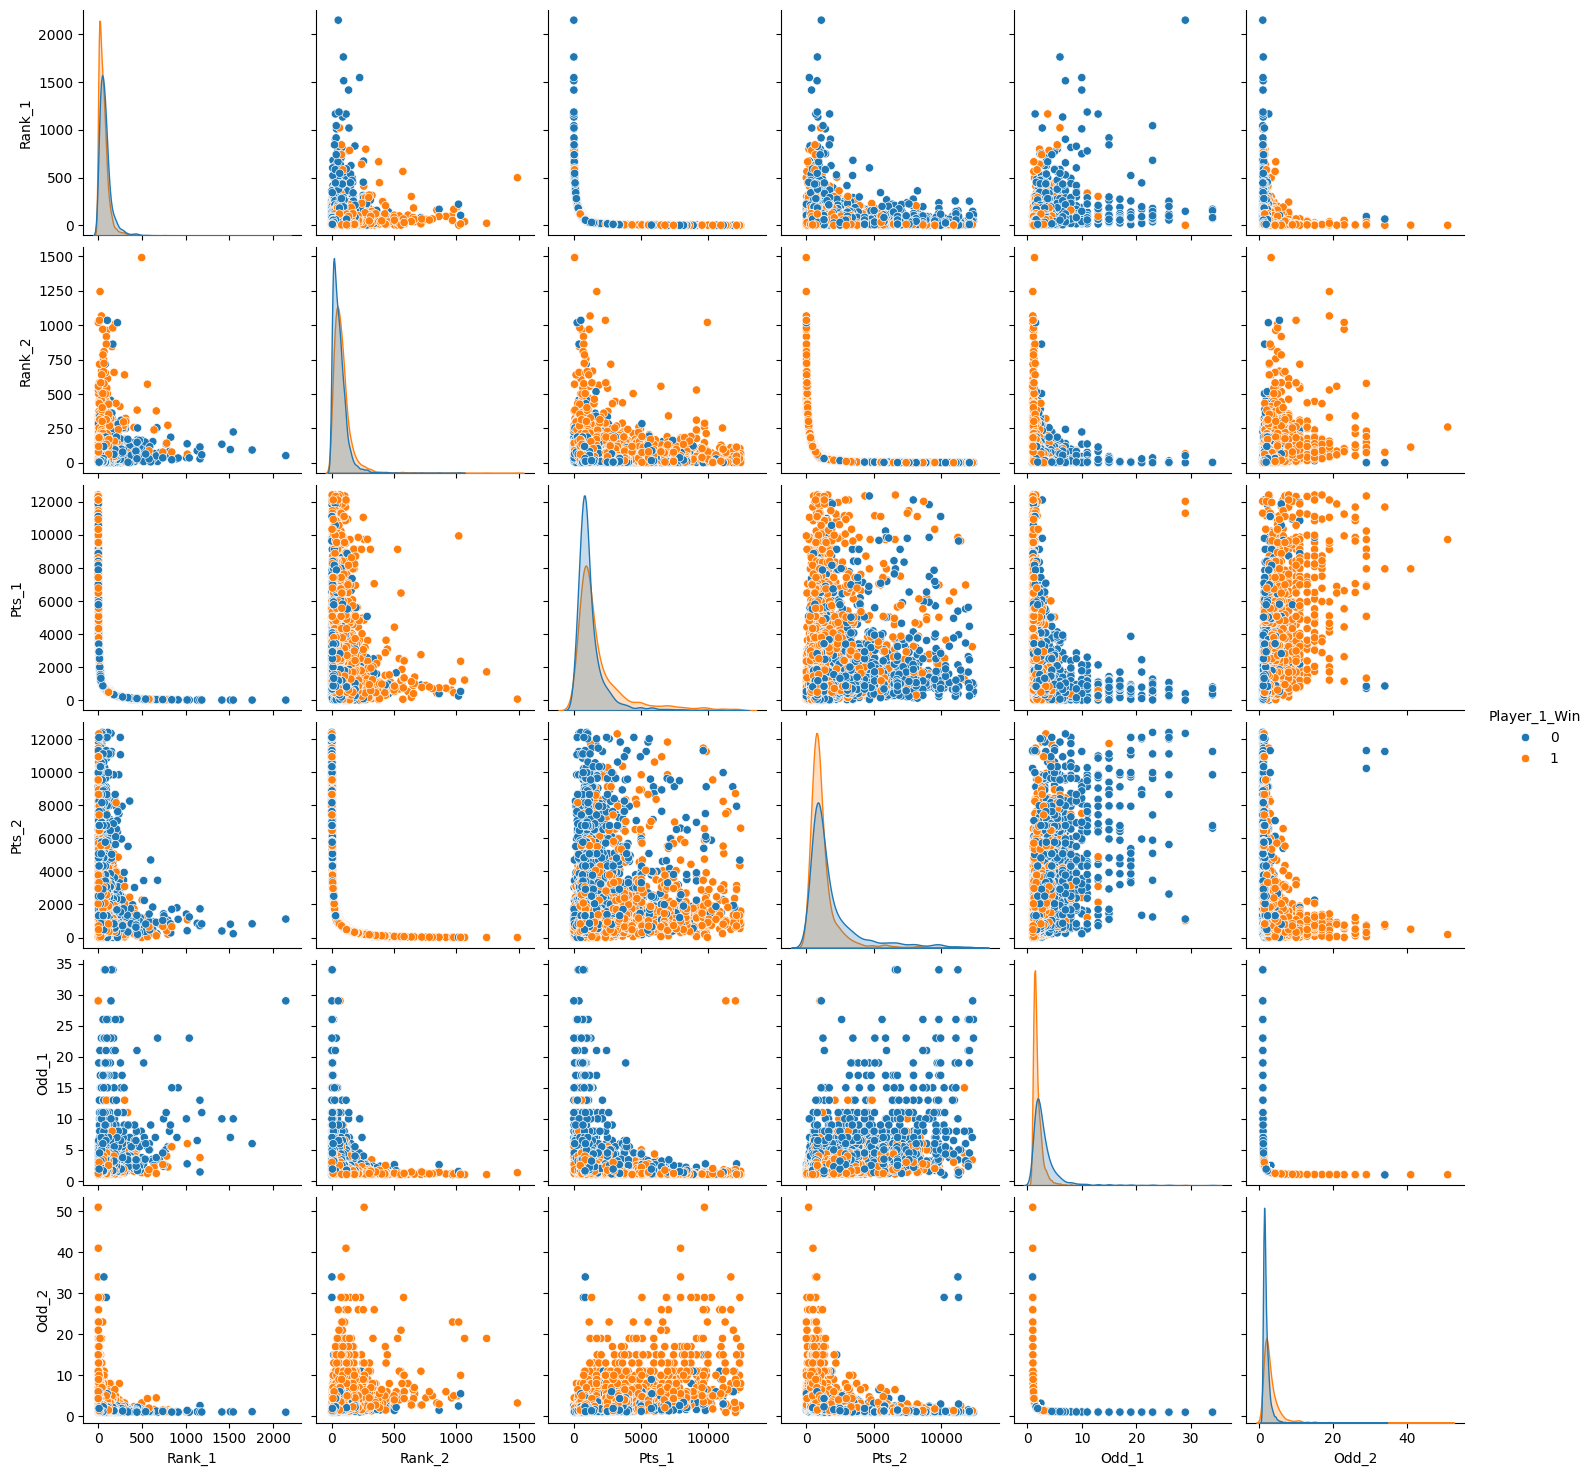

In [17]:
# Summary Statistics & Data Cleaning
print("Summary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicates:")
print(df.duplicated().sum())

# Univariate Analysis
num_features = ['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Odd_1', 'Odd_2']
cat_features = ['Tournament', 'Series', 'Court', 'Surface', 'Round']

print("\nUnivariate Analysis:")
for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

top_n = 10  # Set to lower number of tourneys to display due to high dimensionality
for col in cat_features:
    if col == 'Tournament':
        # Get the top N most common categories
        top_categories = df[col].value_counts().nlargest(top_n).index
        plt.figure(figsize=(10, 6))
        sns.countplot(y=col, data=df[df[col].isin(top_categories)], order=top_categories)
        plt.title(f'Top {top_n} Most Frequent {col}')
    else:
        plt.figure(figsize=(10, 4))
        sns.countplot(y=col, data=df, order = df[col].value_counts().index)
        plt.title(f'Countplot of {col}')
    plt.show()

# Bivariate Analysis
print("\nBivariate Analysis:")
for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Player_1_Win', y=col, data=df)
    plt.title(f'Boxplot of {col} by Winner')
    plt.show()

# Correlation Analysis
print("\nCorrelation Analysis:")
corr_matrix = df[num_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Outlier Detection:
print("\nOutlier Detection:")
for col in num_features:
    df[f'z_score_{col}'] = np.abs(stats.zscore(df[col].dropna()))  # dropna() to exclude NaN values (if there are any) for z-score calculation
    outliers = df[df[f'z_score_{col}'] > 3]
    print(f'Number of outliers in {col}: {len(outliers)}')

# Visualizing relationships
sns.pairplot(df[num_features + ['Player_1_Win']], hue='Player_1_Win')
plt.show()

### **Conclusions of EDA**

This data set is already clean, as there are no missing values and duplicates.

We observe that rankings (`Rank_1`, `Rank_2`) and points (`Pts_1`, `Pts_2`) are right-skewed, indicating higher frequencies of lower-ranked players and points. Odds (`Odd_1`, `Odd_2`) are also right-skewed, suggesting the presence of clear favorites in matches. Outdoor hard courts are the predominant playing surface, and early rounds are more commonly represented in the data.

The box plots comparing features like rankings and points against match winners show a tighter distribution for winners, thus supporting the predictive value of these variables. The correlation heatmap shows a negative correlation between a player's ATP rank and their accrued points: as `Rank_1` increases, `Pts_1` tends to decrease. This is expected since a lower rank (a higher number) typically corresponds to fewer points. The betting odds are moderately positively correlated with the points, suggesting that odds tend to favor players with higher points. Outliers are present, suggesting occasional upsets, which can make the game fun to watch.


###**Intuition: Significant predictors**###

I will later verify whether my intuition is correct and if we need to add new features for the models. For now, below are the predictors I expect to be important:

1. **Ranking (`Rank_1` and `Rank_2`)**: Strong indicator to assess a player's future success based on the current season's ranking.

2. **Points (`Pts_1` and `Pts_2`)**: Contribute to ranking, thus strong indicator.

3. **Odds (`Odd_1` and `Odd_2`)**: Since they are a direct reflection of the expected probability of each player winning a match, derived from the betting markets.

Some predictors that could be important, but not as important as the ones above:

4. **Playing Surface (`Surface`)**: Different players have different skills on different surfaces (clay, grass, hard), which could affect match outcomes.

5. **Court Type (`Court`)**: Whether a match is played indoors or outdoors can influence the game conditions and the outcomes, particularly if players have shown preferences or better results in one type over another.

Next, I wanted to make sure there are no biases for Player 1 (or Player 2) to be the one that wins more. So I checked the following way:

In [4]:
# Calculate the number of wins for 'Player_1'
player1_wins = df['Player_1_Win'].sum()

# Calculate the total number of matches
total_matches = len(df)

# Calculate the percentage of matches where 'Player_1' is the winner
player1_win_percentage = (player1_wins / total_matches) * 100

print(f"Player 1 wins: {player1_wins}")
print(f"Total matches: {total_matches}")
print(f"Percentage of matches where Player 1 wins: {player1_wins / total_matches * 100:.2f}%")


Player 1 wins: 4833
Total matches: 9666
Percentage of matches where Player 1 wins: 50.00%


The output indicates that Player 1 wins exactly 50% of the matches. Nice result! This means that there is no inherent bias in the dataset towards Player 1 being the winner. The data is balanced, which is ideal for training models.

##**Feature Engineering and Preprocessing**##

The following features will be created:

- Difference in Rank (`Rank_Difference`): By calculating the difference in ranks between the two players, I provide the model with a single feature that represents the relative skill levels, according to the ranking system.
This helps the model understand not just the absolute ranks but the gap between the players’ ranks, which can be predictive of the match outcome.

- Difference in Points (`Points_Difference`): Similar to rank difference, the points difference between players can be an indicator of their form and past performance, which may influence the match outcome.


- Odds Ratio (`Odds_Ratio`): The betting odds ratio gives an insight into the expected probability of each player winning, as perceived by the betting market. This ratio can show how confident the public is in a player winning.

Preprocessing steps:

- One-Hot Encoding for `Series` and `Surface`: Categorical variables like the series (ATP250, Masters 1000 etc.) and surface type (Hard, Clay, Grass) are transformed into binary so the models can process them.

- Ordinal Encoding for `Round`: Ordinal encoding will help models discern the stage of the tournament, which might correlate with player performance due to varying levels of pressure or fatigue.

- Binary Encoding for `Court`: Encode court type to binary (Outdoor/Indoor).

- Normalization: Normalization will ensure that each feature contributes equally to the decision process.






In [5]:
# Drop the 'score' column, not needed for training
df.drop('score', axis=1, inplace=True)

# Convert 'Date' to datetime format and extract year, month, and day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Feature Engineering
df['Rank_Difference'] = df['Rank_1'] - df['Rank_2']
df['Points_Difference'] = df['Pts_1'] - df['Pts_2']
df['Odds_Ratio'] = df['Odd_1'] / df['Odd_2']

# One-Hot Encoding for categorical variables
onehot_features = ['Series', 'Surface', 'Tournament', 'Court']
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(df[onehot_features])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_features), index=df.index)

# Ordinal Encoding for 'Round'
ordinal_features = ['Round']
round_categories = ['1st Round', '2nd Round', '3rd Round', '4th Round', 'Quarterfinals', 'Semifinals', 'The Final', 'Round Robin']
ordinal_encoder = OrdinalEncoder(categories=[round_categories])
ordinal_encoded = ordinal_encoder.fit_transform(df[ordinal_features])
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=['Round_Ordinal'], index=df.index)

# Combine the encoded features with the rest of the dataset
df_final = pd.concat([df.drop(onehot_features + ordinal_features, axis=1), onehot_encoded_df, ordinal_encoded_df], axis=1)

# Define binary target variable
df_final['Player_1_Win'] = (df['Winner'] == df['Player_1']).astype(int)

# Drop non-encoded categorical variables and redundant columns
columns_to_drop = ['Player_1', 'Player_2', 'Winner', 'Odd_1', 'Odd_2']
df_final.drop(columns=columns_to_drop, inplace=True)

# Normalizing numerical features
numerical_features = ['Rank_1', 'Rank_2', 'Pts_1', 'Pts_2', 'Rank_2','Points_Difference', 'Odds_Ratio', 'Year', 'Month', 'Day']
scaler = StandardScaler()
df_final[numerical_features] = scaler.fit_transform(df_final[numerical_features])

# Split the data into features and target
X = df_final.drop('Player_1_Win', axis=1)
y = df_final['Player_1_Win']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


###**Feature Selection**###
Now I would like to verify what the best features are for the models.
L1 (Lasso) regularization one method to select the best features for Logistic Regression. L1 regularization adds a penalty equal to the absolute value of the coefficients to the loss function, promoting a sparse solution where less important features have zero coefficients. This method helps with model interpretability, as it keeps only the significant predictors. It also prevents overfitting.

In [6]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression
lasso = LogisticRegression(penalty='l1', C=0.01, solver='saga', random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Feature selection
selector = SelectFromModel(lasso, prefit=True)
selected_features = X_train.columns[selector.get_support()]
print("Selected features:", selected_features)

# Check coefficients
selected_features_coefficients = lasso.coef_[0][selector.get_support()]
for feature, coef in zip(selected_features, selected_features_coefficients):
    print(f"{feature}: {coef}")


Selected features: Index(['Best of', 'Rank_2', 'Pts_1', 'Rank_Difference', 'Points_Difference',
       'Odds_Ratio'],
      dtype='object')
Best of: 0.004597681312396535
Rank_2: 0.03418972773580035
Pts_1: 0.07712425369302071
Rank_Difference: -0.07838349226101719
Points_Difference: 0.177638063110445
Odds_Ratio: -0.9993336917440662


Some features align well with my intitial intuition, some don't:

`Best of`: This could suggest that matches with a "Best of Five" format might slightly favor Player 1, or it might simply reflect some underlying aspect of player performance or endurance in longer matches. This one is a bit surprising.

`Rank_2` indicates the rank of Player 2, and a positive coefficient suggests that a higher rank (numerically larger, indicating a lower-ranked player) increases Player 1's chances of winning, which is expected as higher-ranked players are typically better.

`Rank_Difference` has a negative coefficient, suggesting that a greater difference in ranks (where Player 1 is much better ranked than Player 2) increases Player 1's likelihood of winning.

`Pts_1` represents the ranking points of Player 1, and its positive coefficient implies that Player 1 has more chances at winning. This is intuitive.

`Points_Difference`, also with a positive coefficient, shows that a larger point difference in favor of Player 1 correlates with higher win probabilities.

`Odds_Ratio`: A lower odds ratio (favoring Player 1) is significantly associated with winning. This supports that betting odds should be included in the models.

# **Logistic Regression**

Logistic regression with cross-validation will be implemented. Cross validation is important as it ensures the robustness and generalizability of the model, preventing it from being overly optimized for a particular set of data.

Logistic regression is a model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist.

Mathematically, logistic regression estimates a multiple linear regression function defined as:

$$
\log\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n
$$

where $p$ is the probability of the dependent event occurring, $\beta_0, \beta_1, \beta_2, ..., \beta_n$ are the regression coefficients, and $x_1, x_2, ..., x_n$ are the explanatory variables.

This logistic function can be expressed as:

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n)}}
$$

Here, the function returns a probability score between 0 and 1. In order to make a prediction, a threshold is set, typically 0.5: if the estimated probability is above 0.5, the event is predicted to happen; if it is below 0.5, it is not.

This method is widely used for binary classification tasks.




In [7]:
# Define the model
final_model = LogisticRegression()

# Define the cross-validator: StratifiedKFold maintains the percentage of samples for each class.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for accuracy
cv_accuracy = cross_val_score(final_model, X[selected_features], y, cv=cv, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_accuracy.mean():.2f} +/- {cv_accuracy.std():.2f}")

# Perform cross-validation for ROC AUC
cv_roc_auc = cross_val_score(final_model, X[selected_features], y, cv=cv, scoring='roc_auc')
print(f"Cross-validated ROC AUC: {cv_roc_auc.mean():.2f} +/- {cv_roc_auc.std():.2f}")

# Perform cross-validation for F1 Score
cv_f1 = cross_val_score(final_model, X[selected_features], y, cv=cv, scoring='f1')
print(f"Cross-validated F1 Score: {cv_f1.mean():.2f} +/- {cv_f1.std():.2f}")

# Perform cross-validation for Recall
cv_recall = cross_val_score(final_model, X[selected_features], y, cv=cv, scoring='recall')
print(f"Cross-validated Recall: {cv_recall.mean():.2f} +/- {cv_recall.std():.2f}")

# Perform cross-validation for Precision
cv_precision = cross_val_score(final_model, X[selected_features], y, cv=cv, scoring='precision')
print(f"Cross-validated Precision: {cv_precision.mean():.2f} +/- {cv_precision.std():.2f}")

# Train and evaluate the model on the train/test split for a direct comparison
final_model.fit(X_train[selected_features], y_train)
y_pred = final_model.predict(X_test[selected_features])
y_pred_proba = final_model.predict_proba(X_test[selected_features])[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the evaluation metrics from the train/test split
print("\nEvaluation Metrics from Train/Test Split:")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall Score: {recall:.2f}")
print(f"Precision: {precision:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validated Accuracy: 0.67 +/- 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validated ROC AUC: 0.74 +/- 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validated F1 Score: 0.70 +/- 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validated Recall: 0.75 +/- 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validated Precision: 0.65 +/- 0.01

Evaluation Metrics from Train/Test Split:
Accuracy: 0.67
ROC AUC: 0.74
F1 Score: 0.68
Recall Score: 0.75
Precision: 0.63


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Despite various attempts to achieve model convergence with logistic regression, including adjusting the regularization strength and increasing the maximum number of iterations, the model failed to converge. This suggests potential underlying issues such as feature multicollinearity or that the linear model assumptions do not hold for this dataset. This indicates the need for further investigation with alternative modeling. Future work will explore these alternatives and additional preprocessing steps to address these challenges.


##**Logistic Regression Results**##

**Accuracy** of 67% means that the model is reasonably effective, but not perfect in predicting if Player 1 will win or lose a match.

**ROC AUC** summarizes the model's ability to discriminate between the positive (Player 1 wins) and negative outcomes (Player 1 loses) across some set threshold settings. The AUC value ranges from 0 to 1, where 0.5 denotes a model with no discrimination ability (which can be considered similar to "random guessing"), and 1 denotes perfect discrimination. So the result of 0.74 implies a moderate discriminatory performance.

**Recall score** measures the model's ability to identify all relevant instances (all actual Player 1 wins in this case). A recall of 0.75 means that the model correctly identifies 75% of all actual Player 1 wins.

**Precision** measures the how accurate positive predictions are. A precision of 0.63 indicates that 65% of the model's predictions of Player 1 winning are correct.

**The F1 score** is the harmonic mean of precision and recall. An F1 score of 0.70 suggests a good balance between precision and recall.



##**Support Vector Machine (SVM)**##

Support Vector Machines (SVM) are a set of supervised learning methods used for classification, regression, and outliers detection. The fundamental idea behind SVM is to find a hyperplane in an $N$-dimensional space (where $N$ is the number of features) that distinctly classifies the data points.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e., the maximum distance between data points of both classes. Mathematically, this can be expressed as solving the following optimization problem:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
$$
subject to:
$$
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1, \quad \forall i
$$

where $\mathbf{w}$ is the normal vector to the hyperplane, $\mathbf{x}_i$ are the training examples, $y_i \in \{-1, 1\}$ are the labels, and $b$ is the bias.

SVMs are effective in high dimensional spaces and still effective in cases where the number of dimensions is greater than the number of samples. They are also versatile as different Kernel functions can be specified for the decision function. Common kernels include linear, polynomial, Radial Basis Function (RBF), and sigmoid.



### **Applying SVM with Different Kernels**
Depending on the relationships between features in the data, different kernels can help idenitfy different types of patterns and interactions, which might be linear or non-linear.

**SVM with RBF Kernel** - Non-linear kernel

The RBF kernel, defined by the equation below, transforms the feature space into an infinite-dimensional space, which is quite computationally intensive.

$$K(x_i, x_j) = \exp\left(-\gamma \|x_i - x_j\|^2\right)$$

The need to compute the exponential function for each pair of points in the dataset across all training examples leads to a complexity of
$𝑂(𝑛^2⋅𝑑)$,where n is the number of training examples and d is the number of features.

Given the computational demands such as memory usage, scalability issues, and parameter sensitivity, some solutions to make this model usable are to implement PCA (Principal Component Analysis) to reduce dimenstionality or to train the model on a smaller set of data.


In [8]:
# Applying PCA to retain 95% of the variance on the already scaled training data
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Transform the test data using the same PCA

print(f"Original number of features: {X_train_scaled.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

Original number of features: 119
Reduced number of features after PCA: 99


Note the 119 features from an originally significantly lower numbber suggests significant expansion due to the preprocessing steps applied to the data, particularly from one-hot encoding.

In [9]:
# Initialize and train the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_rbf.fit(X_train_pca, y_train)

# Make predictions
y_pred = svm_rbf.predict(X_test_pca)
y_pred_proba = svm_rbf.predict_proba(X_test_pca)[:, 1]  # For ROC AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.57
ROC AUC: 0.63
F1 Score: 0.59
Recall: 0.64
Precision: 0.55


After training the model, due to the very poor computational capacity, I will not continue with cross-validation. Perhaps this could be implemented on a more powerful machine, however, I believe other models are much better suited for our goals.

Not only that the model was slow to train, but it was also prone to over fitting. Overall, this model proved to be highly impractical on a large data set and the results are quite poor.


However, next I will also try using only the selected_features, and not all the features.

In [13]:
# Standardizing the data on selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[selected_features])

# Applying PCA to retain 95% of the variance on the scaled selected features
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Splitting the data into training and testing sets after PCA transformation
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_rbf.fit(X_train_pca, y_train)

# Make predictions
y_pred = svm_rbf.predict(X_test_pca)
y_pred_proba = svm_rbf.predict_proba(X_test_pca)[:, 1]  # For ROC AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")


Accuracy: 0.67
ROC AUC: 0.73
F1 Score: 0.67
Recall: 0.71
Precision: 0.64


These results are a lot better than the pevious results obtained before selecting the features, indicating that it was a good choice to implement feature selection.

**SVM with Linear Kernel**

The linear kernel is particularly straightforward, defined simply as the dot product between two vectors. Here's how the linear kernel is mathematically represented:
$$K(x, x') = x^T x'$$

Where 𝑥 and 𝑥′ are feature vectors in the input space.

The SVM with a linear kernel is known for its simplicity, scalability, and computational efficiency. It is especially suitable for high-dimensional data, which is exactly what we are looking for.


Grid search was aslo implemented - which is a systematic approach to tuning hyperparameters so that we can find the best possible model for prediction. In this case, the grid search was employed to optimize the regularization parameter 'C' of the Support Vector Machine (SVM) with a linear kernel.




In [14]:
# df_final and selected_features are defined
X = df_final[selected_features]
y = df_final['Player_1_Win']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize SVM with a linear kernel
svm_linear = SVC(kernel='linear', C=1.0)

# Perform Grid Search to find the best C (regularization parameter)
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(svm_linear, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_svm_linear = grid_search.best_estimator_

# Predict on the testing set
y_pred = best_svm_linear.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")


Best parameters: {'C': 1}
Accuracy: 0.66
F1 Score: 0.70
Recall: 0.82
Precision: 0.61


##**Random Forests**##
Random Forests operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes for(classification). Mathematically, a Random Forest can be described as follows:

Given a set of $N$ training samples $X = \{(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N)\}$, where $x_i$ are the feature vectors and $y_i$ are the labels, a Random Forest constructs $M$ decision trees. Each tree $T_m$, where $m = 1, 2, \dots, M$, is built on a bootstrap sample of the training data.

The prediction of the Random Forest for a new sample $x$ is given by:
$$\hat{y} = \text{mode} \{ T_1(x), T_2(x), \dots, T_M(x) \} $$
for classification.

Each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition to bootstrap sampling, Random Forests use feature randomness when splitting a node: instead of searching for the most advantageous split among all features, a random subset of features is selected, from which the best split is used. This concept introduces more diversity in the model and is the key for the robustness of the Random Forest, making it less prone to overfitting on the training data.


In [15]:
from sklearn.model_selection import RandomizedSearchCV

# 'Player_1_Win' is the target and the rest are features
X = df.drop(['Player_1_Win'], axis=1)
y = df['Player_1_Win']  # Target variable

# Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid as a distribution
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized search on hyper parameters
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best estimator
best_rf = random_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Performance evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print results
print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Accuracy: 0.67
F1 Score: 0.66
Recall: 0.66
Precision: 0.66


**Note**: I initially applied Grid Search step to find the best hyperparameters, however, the execution time was taking too long. I first tried to reduce the number of parameters, and then I limited the range values, but that didn't help much. So I switched to Randomized Search, which drastically reduced computational times. This method samples a given number of candidates from a parameter space with a specified distribution.

After figuring out what works and what doesn't, I can now perform cross validation.

In [16]:
# Perform cross-validation
cv_accuracy = cross_val_score(best_rf, X_scaled, y, cv=5, scoring='accuracy')
cv_f1 = cross_val_score(best_rf, X_scaled, y, cv=5, scoring='f1')
cv_recall = cross_val_score(best_rf, X_scaled, y, cv=5, scoring='recall')
cv_precision = cross_val_score(best_rf, X_scaled, y, cv=5, scoring='precision')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validated Metrics:")
print(f"CV Accuracy: Mean = {np.mean(cv_accuracy):.2f}, Std = {np.std(cv_accuracy):.2f}")
print(f"CV F1 Score: Mean = {np.mean(cv_f1):.2f}, Std = {np.std(cv_f1):.2f}")
print(f"CV Recall: Mean = {np.mean(cv_recall):.2f}, Std = {np.std(cv_recall):.2f}")
print(f"CV Precision: Mean = {np.mean(cv_precision):.2f}, Std = {np.std(cv_precision):.2f}")

Cross-Validated Metrics:
CV Accuracy: Mean = 0.67, Std = 0.01
CV F1 Score: Mean = 0.67, Std = 0.01
CV Recall: Mean = 0.66, Std = 0.02
CV Precision: Mean = 0.68, Std = 0.01


#**Conclusion**#

Here are the key findings from the project:

- **Performance of Models**: Most models, such as Logistic Regression and Random Forests, demonstrated a relatively consistent performance, with an accuracy around 67%. Other performance indicators can be found throught the notebook. This indicates a moderate level of predictability in the dataset with the given features and model configurations.

- **Challenges with SVM using RBF Kernel**: The SVM model with the RBF Kernel was found to be the most challenging in terms of computational efficiency. The non-linear nature of the RBF kernel, while powerful for capturing complex patterns in high-dimensional spaces, proved to be slow and impractical for this particular dataset. This was primarily due to the extensive computation required to map data into a higher-dimensional space, which significantly increased the training and tuning times without a good increase in performance accuracy.

- **Model Suitability**: The findings suggest that for datasets like the one used in this project, where the boundary between classes may not be extremely complex, simpler models or those with linear kernels might provide a better balance between performance and computational efficiency.


Based on the insights gathered from this project, the following ideas can be explored for further analysis:

1. **Feature Engineering**: Further research into feature selection and engineering could potentially improve model accuracy. Identifying more impactful features or creating new feature interactions might provide models with better discriminative power.

2. **Model Simplification**: Given the computational overhead associated with the SVM with RBF Kernel, it is advisable to use simpler or more computationally efficient models unless the increase in accuracy is substantial.

3. **Ensemble Techniques**: Combining the predictions from multiple models through ensemble techniques could also be explored to enhance the predictive performance and reliability over using a single model approach.

4. **Incremental Training Approaches**: For models like SVM that are computationally intensive, approaches such as online learning or using incremental training methods could be explored to manage computational resources better.

5. **Neural Networks**: Investigating the use of neural networks could provide a robust alternative to the models tested, especially for capturing complex and subtle patterns in data that other models might miss. The reason why that was not done in this project is due to the fact that traditional machine learning models like logistic regression, SVM, and random forests already provide robust results. Studies involving similar data have shown that gains from neural networks in sports prediction are often marginal compared to the increased complexity and resource demands.



